In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

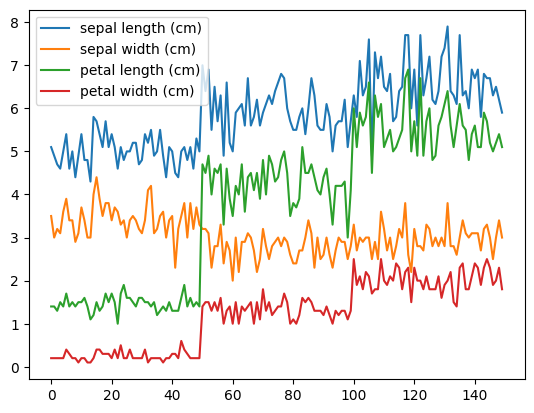

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [5]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [7]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [11]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

# SelectKBEST

In [13]:
from sklearn.feature_selection import SelectKBest , chi2

In [14]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [19]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

# Select From Model

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [34]:
selector = SelectFromModel(SGDClassifier(random_state=0),
                           threshold='mean')

selector.fit_transform(X, y)
selector.get_support()

# selector.estimator_.coef_.mean(axis=0)

array([False, False,  True,  True])

In [28]:
y.shape

(150,)

# Recursive Feature Elimination

In [50]:
from sklearn.feature_selection import RFE , RFECV

In [63]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2 , cv=4)
selector.fit(X, y)
selector.ranking_
selector.cv_results_['mean_test_score']

array([0.81294452, 0.85864154, 0.75889047])